In [12]:
from __future__ import print_function
import cobra
import cobra.test
from os.path import join
cobra.DictList

#iRhto1108N_model with biomass as objective
iRhto1108N_model = cobra.io.read_sbml_model(join(r"C:\Users\helen\Desktop\spring2020\Rao lab\first paper\iRhto_memote-master", "iRhto.xml"))
iRhto1108N_model2 = cobra.io.read_sbml_model(join(r"C:\Users\helen\Desktop\spring2020\Rao lab\first paper\iRhto_memote-master", "iRhto.xml"))
iRhto1108N_model2.objective = "PDAGATpc_rm"

In [13]:
import pandas as pd 
import numpy as np
#import media information
#column 0 is name of exchange reaction, column 1 is upperbound in mM/h/gwd
YNBWAAAS = pd.read_excel("C:/Users/helen/Desktop/spring2020/Rao lab/media_YPA.xlsx", 'rest of ynbwaaas 103', header = None)
YNBWAAAS = YNBWAAAS.to_numpy()
media_without_ynb = pd.read_excel("C:/Users/helen/Desktop/spring2020/Rao lab/media_YPA.xlsx", 'media without ynb', header = None)
media_without_ynb = media_without_ynb.to_numpy()

#initialize storage: row 0 being leucine, row 1 being isoleucine, row 2 being valine.
#Column 0 being growth rate, column 1 being TAG production  
# Note: these arrays are transposed for visualization purposes in the second to last cell
CN_5 = np.zeros((3,2))
CN_100 = np.zeros((3,2))
CN_150 = np.zeros((3,2))

In [14]:
print(YNBWAAAS)
print(media_without_ynb)
#initialize medium storage
test_medium = iRhto1108N_model.medium
medium_v = []
medium_l = []
medium_il = []

[['EX_so4_e' 0.217]
 ['EX_mg2_e' 0.868]
 ['EX_ca2_e' 0.104]
 ['EX_pi_e' 0.439]]
[['EX_ac_e' 13.89 13.89 13.89]
 ['EX_nh4_e' 4.75 0.238 0.159]
 ['EX_cl_e' 4.99 0.475 0.397]
 ['EX_na1_e' 2.26 2.26 2.26]
 ['EX_k_e' 6.27 6.27 6.27]]


In [15]:
#original growth rate
growth = 0
with iRhto1108N_model:
    medium = test_medium.copy()
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][1]
    #remember to set glucose to zero
    medium["EX_glc__D_e"] = 0
    iRhto1108N_model.medium = medium
    growth = iRhto1108N_model.slim_optimize()
growth

0.3145678573890438

In [16]:
#add valine to test growth rate
with iRhto1108N_model:
    medium = test_medium.copy()
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][1]
    medium["EX_val__L_e"] = 10/5
    #remember to set glucose to zero
    medium["EX_glc__D_e"] = 0
    iRhto1108N_model.medium = medium
    medium_v.append(medium.copy())
    CN_5[2][0] = iRhto1108N_model.slim_optimize()

with iRhto1108N_model:
    medium = test_medium.copy()
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][2]
    medium["EX_val__L_e"] = 10/5
    #remember to set glucose to zero
    medium["EX_glc__D_e"] = 0
    iRhto1108N_model.medium = medium
    medium_v.append(medium.copy())
    CN_100[2][0] = iRhto1108N_model.slim_optimize()

with iRhto1108N_model:
    medium = test_medium.copy()
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][3]
    medium["EX_val__L_e"] = 10/5
    #remember to set glucose to zero
    medium["EX_glc__D_e"] = 0
    iRhto1108N_model.medium = medium
    medium_v.append(medium.copy())
    CN_150[2][0] = iRhto1108N_model.slim_optimize()

In [17]:
#add leucine to test growth rate
with iRhto1108N_model:
    medium = test_medium.copy()
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][1]
    medium["EX_leu__L_e"] = 10/6
    #remember to set glucose to zero
    medium["EX_glc__D_e"] = 0
    iRhto1108N_model.medium = medium
    medium_l.append(medium.copy())
    CN_5[0][0] = iRhto1108N_model.slim_optimize()

with iRhto1108N_model:
    medium = test_medium.copy()
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][2]
    medium["EX_leu__L_e"] = 10/6
    #remember to set glucose to zero
    medium["EX_glc__D_e"] = 0
    iRhto1108N_model.medium = medium
    medium_l.append(medium.copy())
    CN_100[0][0] = iRhto1108N_model.slim_optimize()

with iRhto1108N_model:
    medium = test_medium.copy()
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][3]
    medium["EX_leu__L_e"] = 10/6
    #remember to set glucose to zero
    medium["EX_glc__D_e"] = 0
    iRhto1108N_model.medium = medium
    medium_l.append(medium.copy())
    CN_150[0][0] = iRhto1108N_model.slim_optimize()

In [18]:
#add isoleucine
with iRhto1108N_model:
    medium = test_medium.copy()
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][1]
    medium["EX_ile__L_e"] = 10/6
    #remember to set glucose to zero
    medium["EX_glc__D_e"] = 0
    iRhto1108N_model.medium = medium
    medium_il.append(medium.copy())
    CN_5[1][0] = iRhto1108N_model.slim_optimize()
    
with iRhto1108N_model:
    medium = test_medium.copy()
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][2]
    medium["EX_ile__L_e"] = 10/6
    #remember to set glucose to zero
    medium["EX_glc__D_e"] = 0
    iRhto1108N_model.medium = medium
    medium_il.append(medium.copy())
    CN_100[1][0] = iRhto1108N_model.slim_optimize()
    
with iRhto1108N_model:
    medium = test_medium.copy()
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][3]
    medium["EX_ile__L_e"] = 10/6
    #remember to set glucose to zero
    medium["EX_glc__D_e"] = 0
    iRhto1108N_model.medium = medium
    medium_il.append(medium.copy())
    CN_150[1][0] = iRhto1108N_model.slim_optimize()

In [19]:
#test TAG production
TAG = 0
with iRhto1108N_model2:
    medium = test_medium.copy()
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][1]
    #remember to set glucose to zero
    medium["EX_glc__D_e"] = 0
    iRhto1108N_model2.medium = medium
    TAG = iRhto1108N_model2.slim_optimize()
    
################valine###################
with iRhto1108N_model2:
    iRhto1108N_model2.medium = medium_v[0].copy()
    CN_5[2][1] = iRhto1108N_model2.slim_optimize()

with iRhto1108N_model2:
    iRhto1108N_model2.medium = medium_v[1].copy()
    CN_100[2][1] = iRhto1108N_model2.slim_optimize()
    
with iRhto1108N_model2:
    iRhto1108N_model2.medium = medium_v[2].copy()
    CN_150[2][1] = iRhto1108N_model2.slim_optimize()

###################leucine 
with iRhto1108N_model2:
    iRhto1108N_model2.medium = medium_l[0].copy()
    CN_5[0][1] = iRhto1108N_model2.slim_optimize()
    
with iRhto1108N_model2:
    iRhto1108N_model2.medium = medium_l[1].copy()
    CN_100[0][1] = iRhto1108N_model2.slim_optimize()
    
with iRhto1108N_model2:
    iRhto1108N_model2.medium = medium_l[2].copy()
    CN_150[0][1] = iRhto1108N_model2.slim_optimize()
#####################isoleucine
with iRhto1108N_model2:
    iRhto1108N_model2.medium = medium_il[0].copy()
    CN_5[1][1] = iRhto1108N_model2.slim_optimize()

with iRhto1108N_model2:
    iRhto1108N_model2.medium = medium_il[1].copy()
    CN_100[1][1] = iRhto1108N_model2.slim_optimize()

with iRhto1108N_model2:
    iRhto1108N_model2.medium = medium_il[2].copy()
    CN_150[1][1] = iRhto1108N_model2.slim_optimize()



In [20]:
#original growth rate and TAG production using the default media
print("growth rate:", iRhto1108N_model.slim_optimize())
print("TAG production:", iRhto1108N_model2.slim_optimize())
print(iRhto1108N_model.medium)

growth rate: 0.3753060889842409
TAG production: 1.8912824552071366
{'EX_nh4_e': 1000.0, 'EX_glc__D_e': 5.0, 'EX_fe2_e': 1000.0, 'EX_o2_e': 1000.0, 'EX_pi_e': 1000.0, 'EX_na1_e': 1000.0, 'EX_so4_e': 1000.0, 'EX_h_e': 1000.0, 'EX_k_e': 1000.0, 'EX_h2o_e': 1000.0, 'EX_ca2_e': 1000.0, 'EX_cl_e': 1000.0, 'EX_cobalt2_e': 1000.0, 'EX_cu2_e': 1000.0, 'EX_mg2_e': 1000.0, 'EX_mn2_e': 1000.0, 'EX_zn2_e': 1000.0, 'EX_btn_c': 0.01}


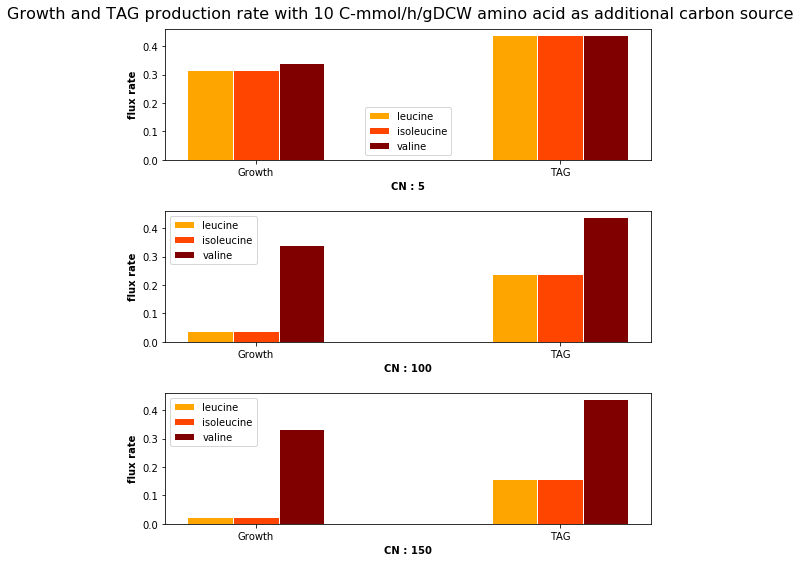

In [21]:
import matplotlib
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, figsize=(8,8))
fig.tight_layout(pad=3.0)
fig.suptitle('Growth and TAG production rate with 10 C-mmol/h/gDCW amino acid as additional carbon source', fontsize=16)

ax_5 = axs[0]
ax_100 = axs[1]
ax_150 = axs[2]

barWidth = 0.15

r1 = np.arange(len(CN_5[0]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

ax_5.bar(r1, CN_5[0], color='#FFA500', width=barWidth, edgecolor='white', label='leucine')
ax_5.bar(r2, CN_5[1], color='#FF4500', width=barWidth, edgecolor='white', label='isoleucine')
ax_5.bar(r3, CN_5[2], color='#800000', width=barWidth, edgecolor='white', label='valine')
ax_5.set_ylabel('flux rate', fontweight='bold')
ax_5.set_xticks([r + barWidth for r in range(2)])
ax_5.set_xticklabels(['Growth', 'TAG'])
ax_5.set_xlabel('CN : 5', fontweight = 'bold')

ax_5.legend()


ax_100.bar(r1, CN_100[0], color='#FFA500', width=barWidth, edgecolor='white', label='leucine')
ax_100.bar(r2, CN_100[1], color='#FF4500', width=barWidth, edgecolor='white', label='isoleucine')
ax_100.bar(r3, CN_100[2], color='#800000', width=barWidth, edgecolor='white', label='valine')
ax_100.set_ylabel('flux rate', fontweight='bold')
ax_100.set_xlabel('CN : 100', fontweight = 'bold')
ax_100.set_xticks([r + barWidth for r in range(2)])
ax_100.set_xticklabels(['Growth', 'TAG'])
ax_100.legend()


ax_150.bar(r1, CN_150[0], color='#FFA500', width=barWidth, edgecolor='white', label='leucine')
ax_150.bar(r2, CN_150[1], color='#FF4500', width=barWidth, edgecolor='white', label='isoleucine')
ax_150.bar(r3, CN_150[2], color='#800000', width=barWidth, edgecolor='white', label='valine')
ax_150.set_ylabel('flux rate', fontweight='bold')
ax_150.set_xlabel('CN : 150', fontweight = 'bold')
ax_150.set_xticks([r + barWidth for r in range(2)])
ax_150.set_xticklabels(['Growth', 'TAG'])
ax_150.legend()




In [22]:
print(CN_5[0])

[0.31456786 0.439     ]
